**PROGRAMMING QUESTIONS- 1 (CATS AND DOGS)**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Flatten
import keras
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras import regularizers
import datetime
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os, shutil
from keras import layers
from keras import models

Using TensorFlow backend.


In [2]:
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

#Creating filenames
original_dataset_dir = '/kaggle/input/catsanddogs/CatsandDogsSmall'
# print(original_dataset_dir)
base_dir = '/kaggle/input/catsanddogs/CatsandDogsSmall'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')
test_dir = os.path.join(base_dir,'test')
train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')
validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')
test_cats_dir = os.path.join(test_dir,'cats')
test_dogs_dir = os.path.join(test_dir,'dogs')
# print("train_dir printed", train_dir)
# print("train_dir printed", validation_dir)
# print("train_dir printed", test_dir)

# os.mkdir(base_dir)
# os.mkdir(train_dir)
# os.mkdir(test_dir)
# os.mkdir(validation_dir)
# os.mkdir(train_cats_dir)
# os.mkdir(train_dogs_dir)
# os.mkdir(validation_cats_dir)
# os.mkdir(validation_dogs_dir)
# os.mkdir(test_cats_dir)
# os.mkdir(test_dogs_dir)

# #Creating subset of images
# fname = ['cat.{}.jpg'.format(i) for i in range(1000)]          #Training Set cat
# for f in fname:                                            
#     src = os.path.join(original_dataset_dir,f)
#     dst = os.path.join(train_cats_dir,f)
#     if os.path.exists(dst)==False:
#         shutil.copyfile(src,dst)
    
# fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]          #validation set cat
# for f in fnames:
#     src = os.path.join(original_dataset_dir,f)
#     dst = os.path.join(validation_cats_dir,f)
#     if os.path.exists(dst)==False:
#         shutil.copyfile(src,dst)

# fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]         #Test Set cat
# for f in fnames:
#     src = os.path.join(original_dataset_dir,f)
#     dst = os.path.join(test_cats_dir,f)
#     if os.path.exists(dst)==False:
#         shutil.copyfile(src,dst)
    
# fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
# for f in fnames:
#     src = os.path.join(original_dataset_dir,f)
#     dst = os.path.join(train_dogs_dir,f)
#     if os.path.exists(dst)==False:
#         shutil.copyfile(src,dst)
    
# fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
# for f in fnames:
#     src = os.path.join(original_dataset_dir,f)
#     dst = os.path.join(validation_dogs_dir,f)
#     if os.path.exists(dst)==False:
#         shutil.copyfile(src,dst)

# fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
# for f in fnames:
#     src = os.path.join(original_dataset_dir,f)
#     dst = os.path.join(test_dogs_dir,f)
#     if os.path.exists(dst)==False:
#         shutil.copyfile(src,dst)
        
#Data Load
def generator():
    i = 0
    while True:
        i += 1
        yield i
for item in generator():
    print(item)
    if item > 4:
        break
        
#Pre-processing
train_datagen = ImageDataGenerator(rescale=1/255, rotation_range=40,
                                  width_shift_range=0.2, height_shift_range=0.2,
                                  shear_range=0.2, zoom_range=0.2,
                                  horizontal_flip=True, fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (150, 150), 
                                                    batch_size = 20, 
                                                    class_mode = 'binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size = (150, 150),
                                                        batch_size = 20, 
                                                        class_mode = 'binary')
test_generator = test_datagen.flow_from_directory(test_dir, 
                                                  target_size = (150, 150), 
                                                  batch_size = 20, 
                                                  class_mode = 'binary')

#Creating model
model = Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.summary()

#compile
opt = keras.optimizers.RMSprop(lr = 1e-4)
model.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['acc'])

#model fit
history = model.fit_generator(train_generator, steps_per_epoch = 100, epochs = 30, validation_data = validation_generator, 
                              validation_steps = 50)
model.save('cats_dogs_model.h5')

# test_loss, test_acc = model.evaluate_generator(test_generator, steps = 50)
# print('test acc:', test_acc)

1
2
3
4
5
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)  

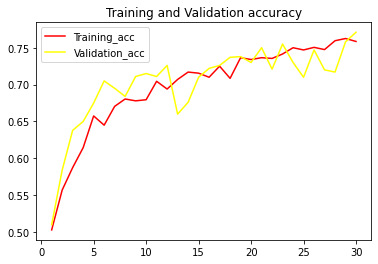

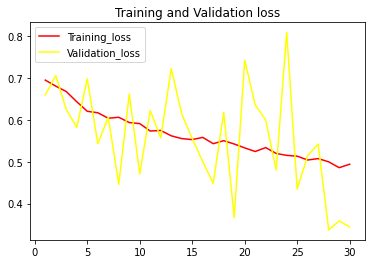

In [3]:
#Plot
acc = history.history['acc']
epochs = range(1, len(acc) + 1)
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

#Accuracy plot
plt.plot(epochs, acc, color = 'red', label = 'Training_acc')
plt.plot(epochs, val_acc, color = 'yellow', label = 'Validation_acc')
plt.title('Training and Validation accuracy')
plt.legend()

#Loss plot
plt.figure()
plt.plot(epochs, loss, color = 'red', label = 'Training_loss')
plt.plot(epochs, val_loss, color = 'yellow', label = 'Validation_loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


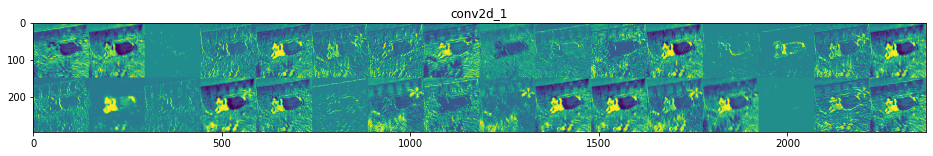

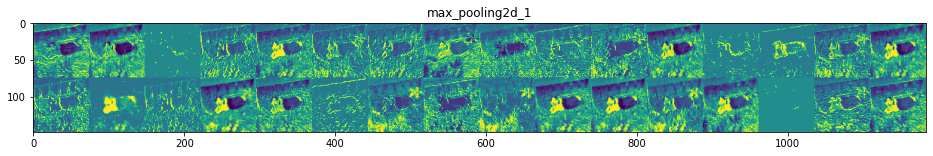

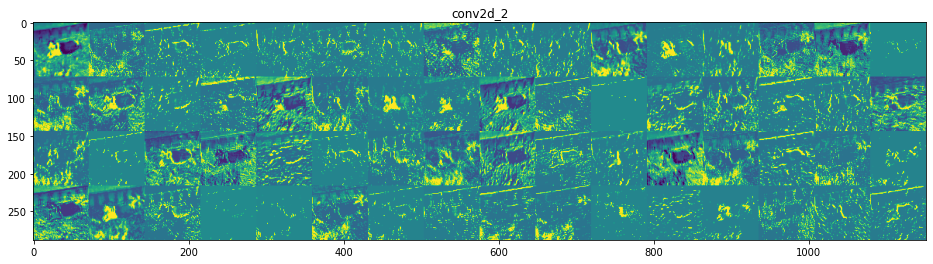

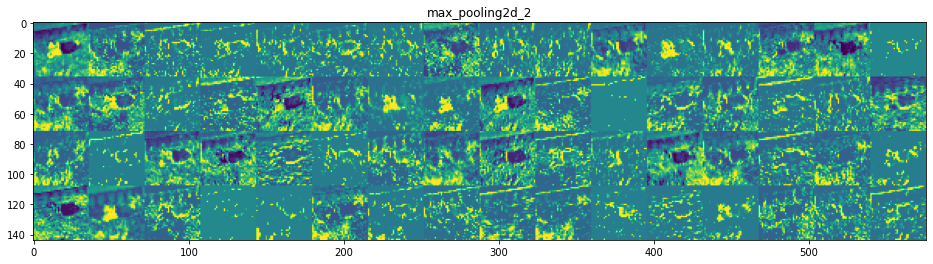

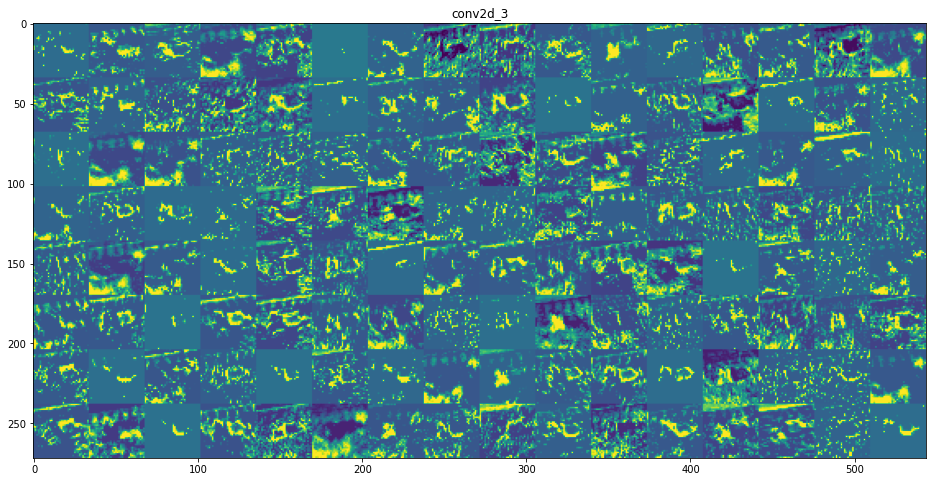

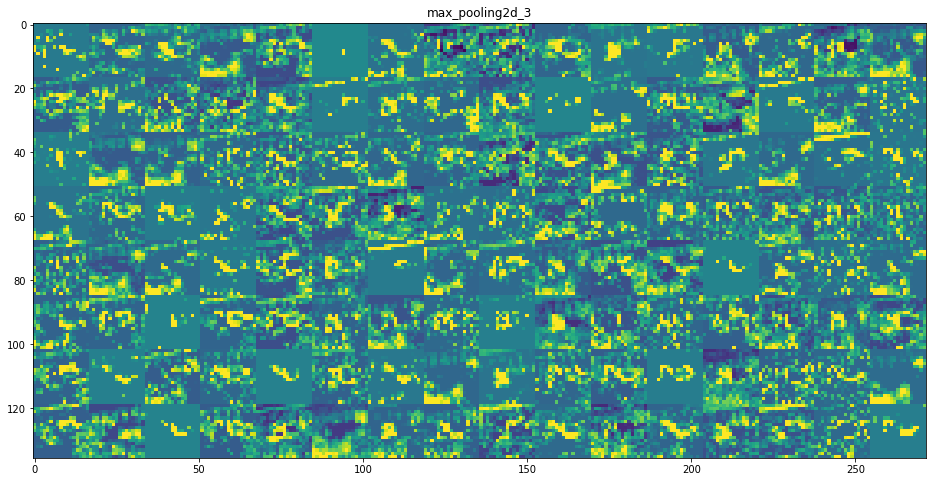

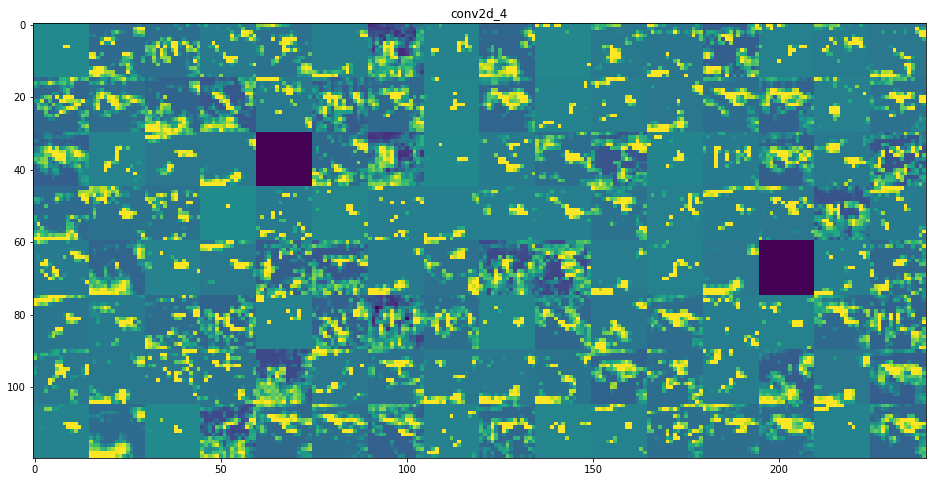

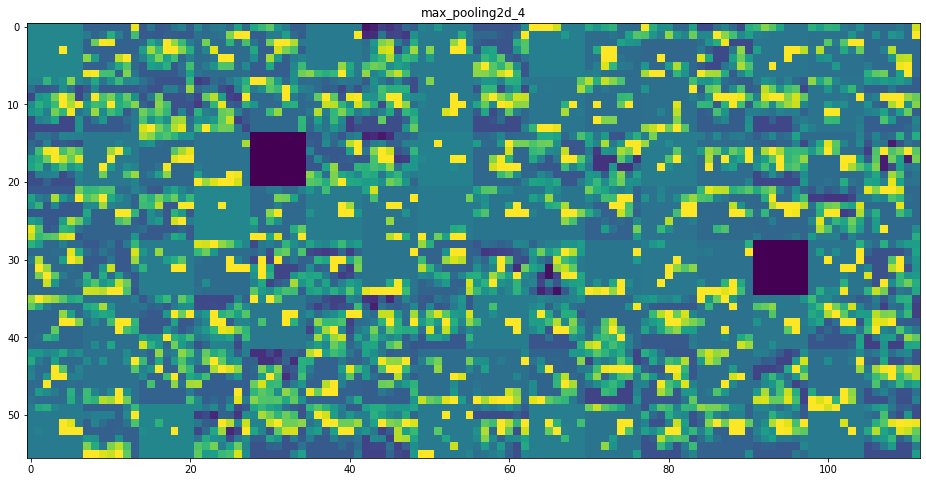

In [4]:
#Model Visualize
from keras.models import load_model
model = load_model('cats_dogs_model.h5')
model.summary()
from keras.preprocessing import image
img_path = '/kaggle/input/catsanddogs/CatsandDogsSmall/test/cats/cat.1507.jpg'
img = image.load_img(img_path, target_size = (150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis = 0)
img_tensor /= 255.
layer_outputs = [layer.output for layer in model.layers[:8]]
print(layer_outputs)
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(img_tensor)

layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16
for layer_name,layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col*size : (col + 1)*size, row*size : (row+1)*size] = channel_image
    #Plotting
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1], scale*display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect = 'auto', cmap = 'viridis')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

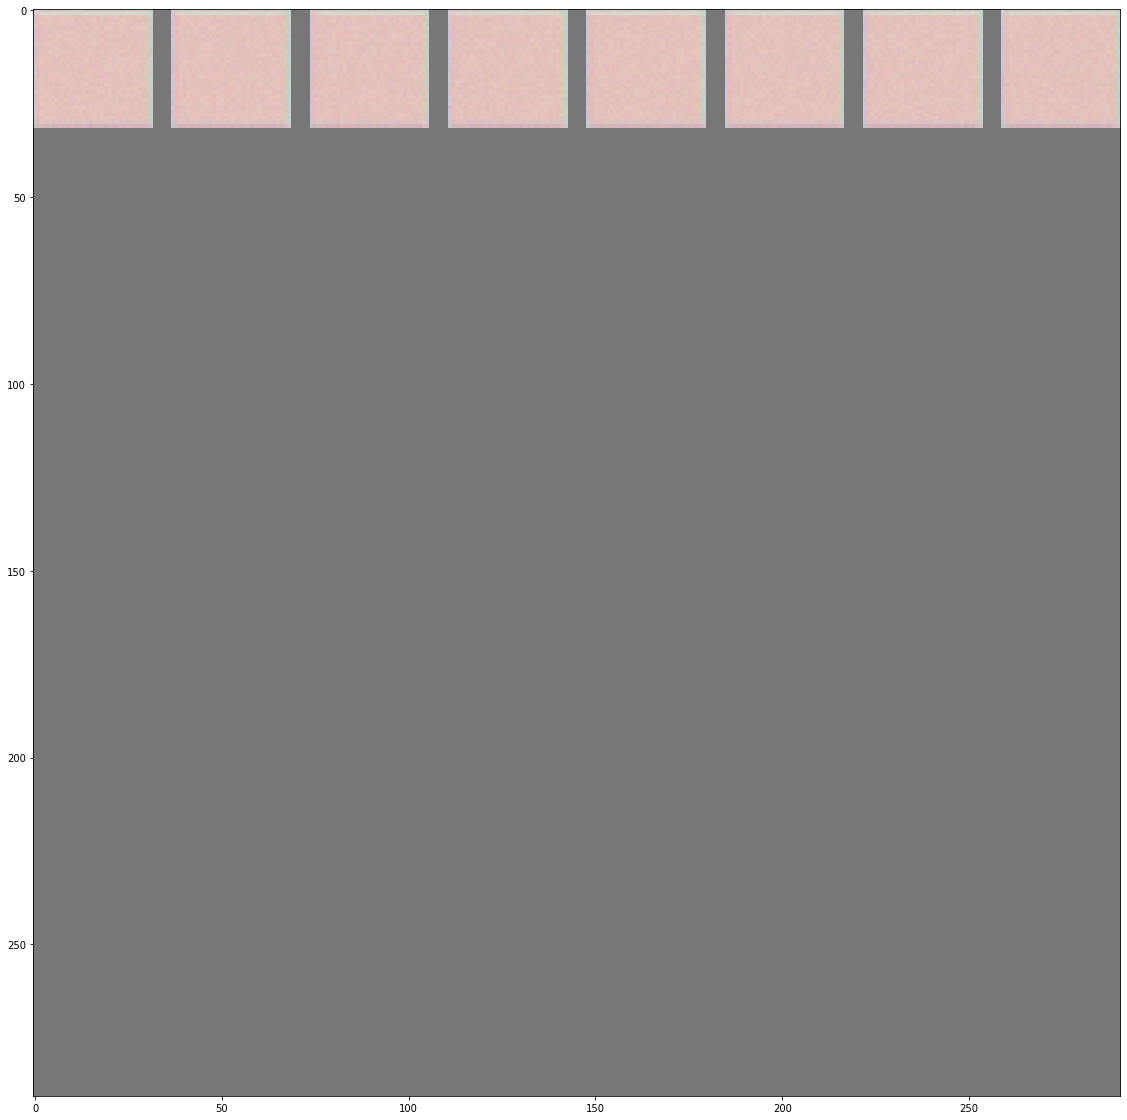

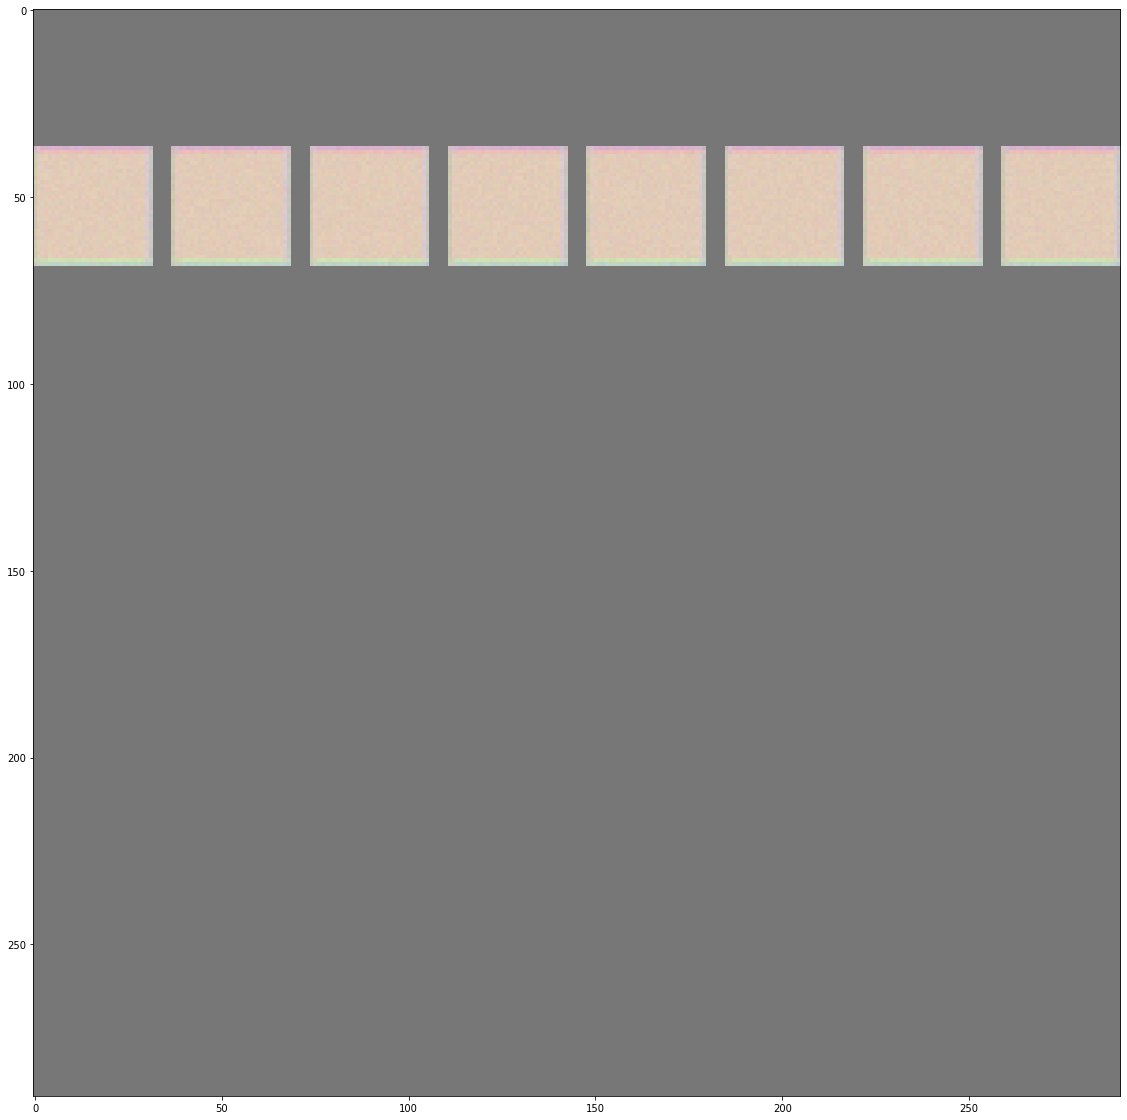

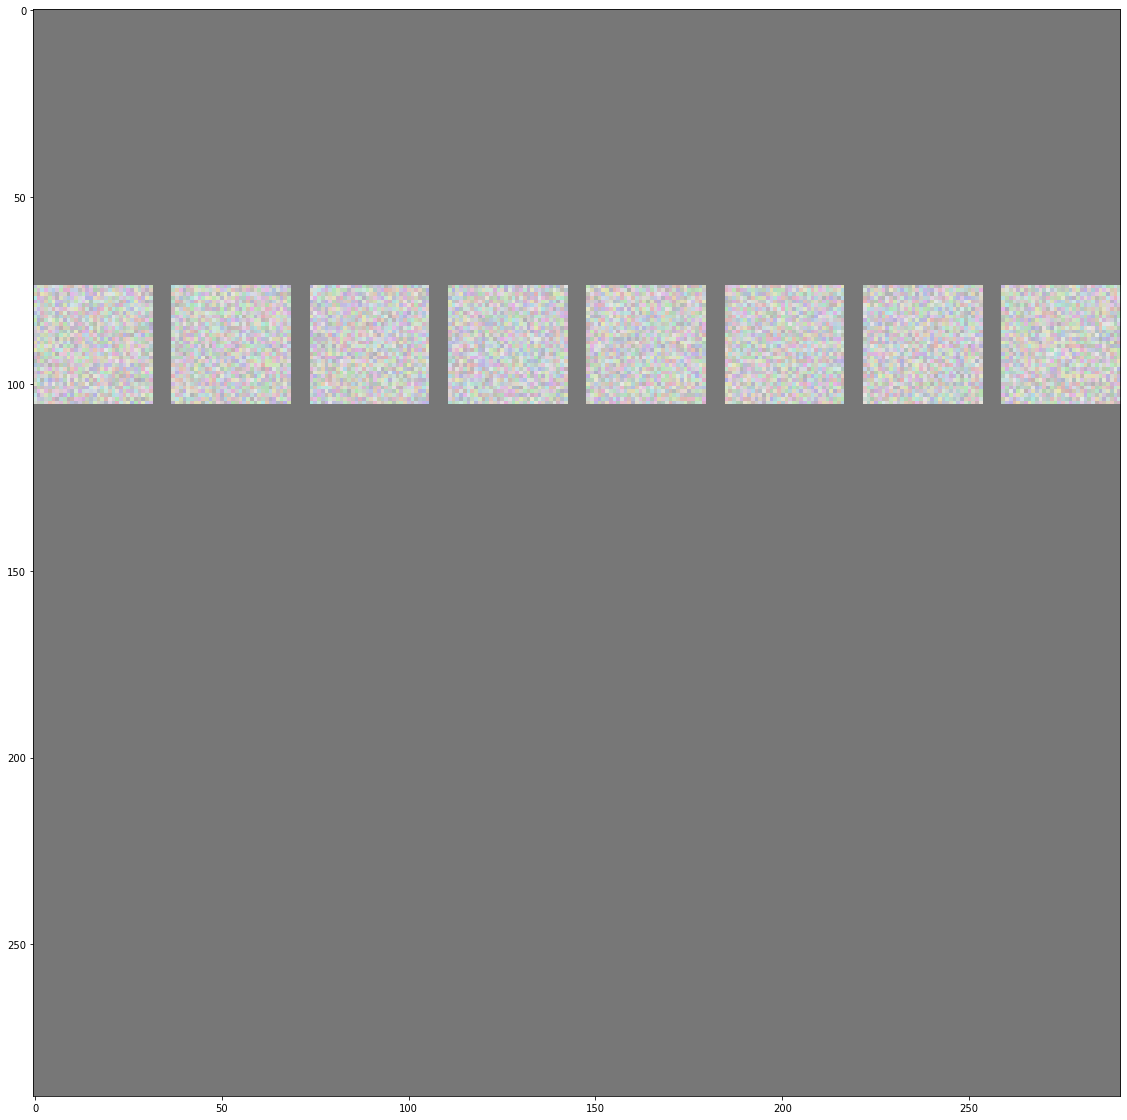

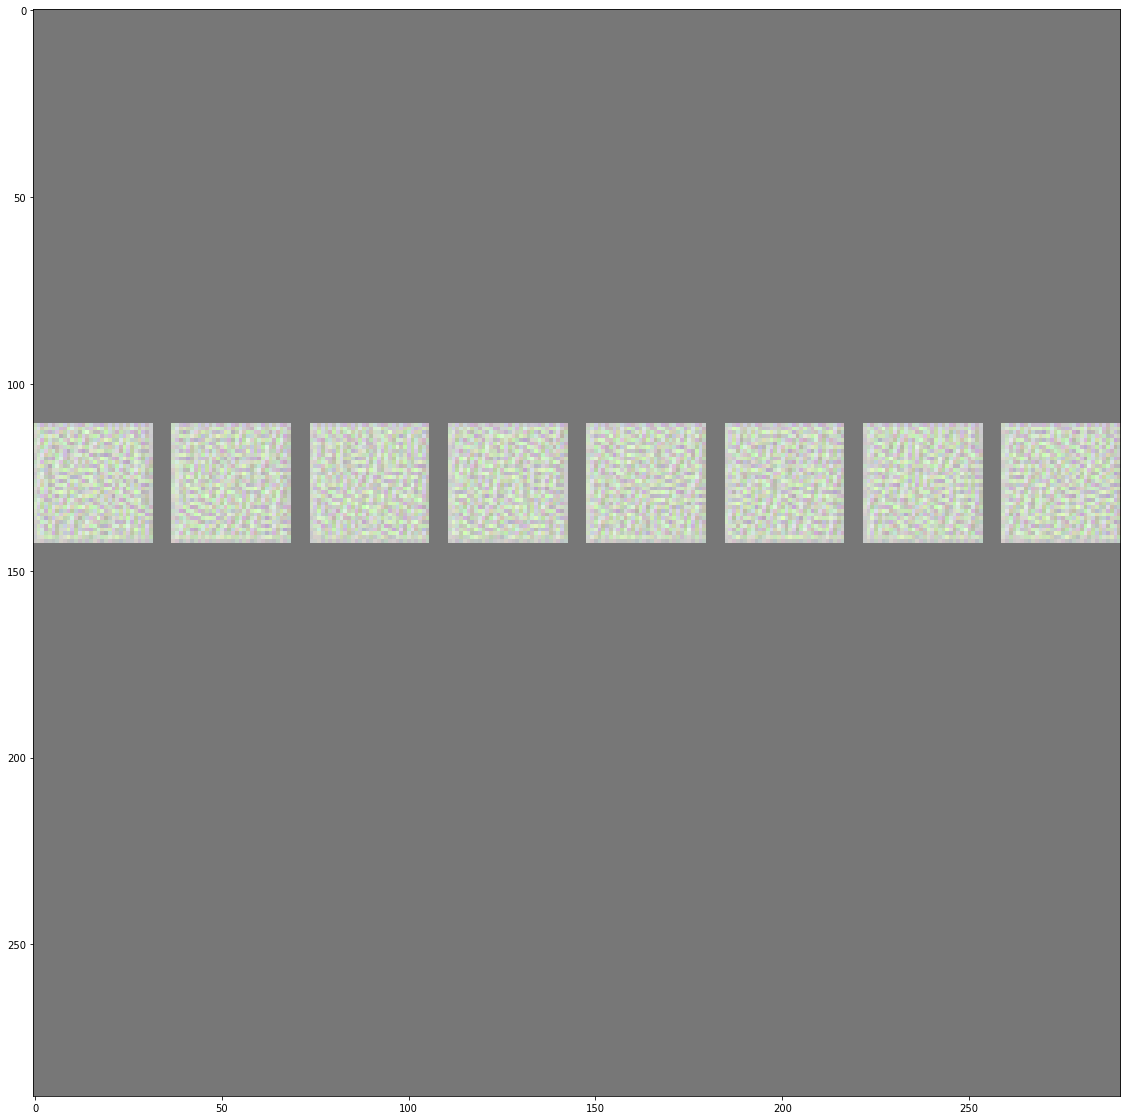

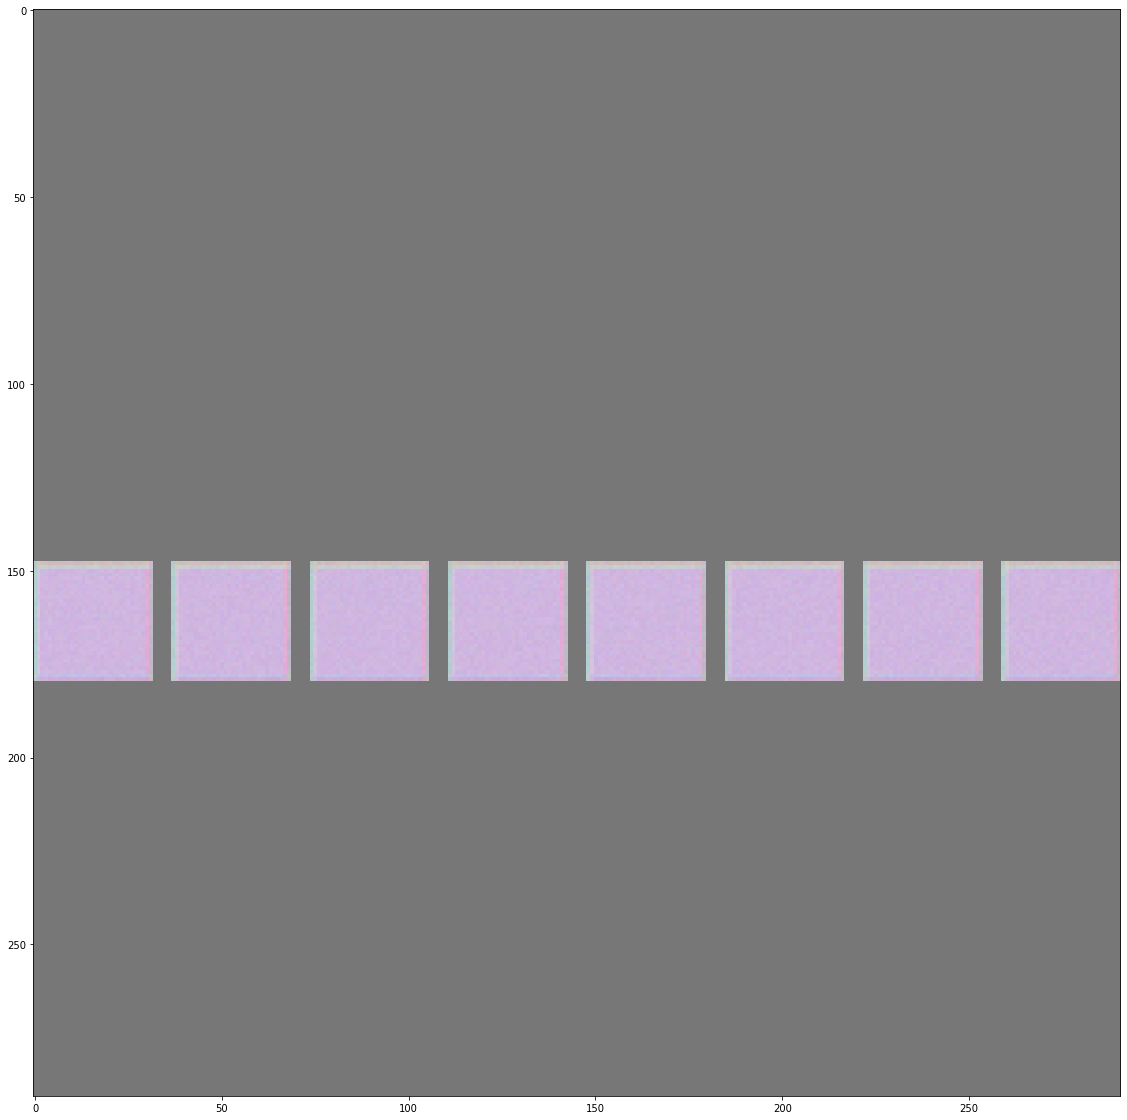

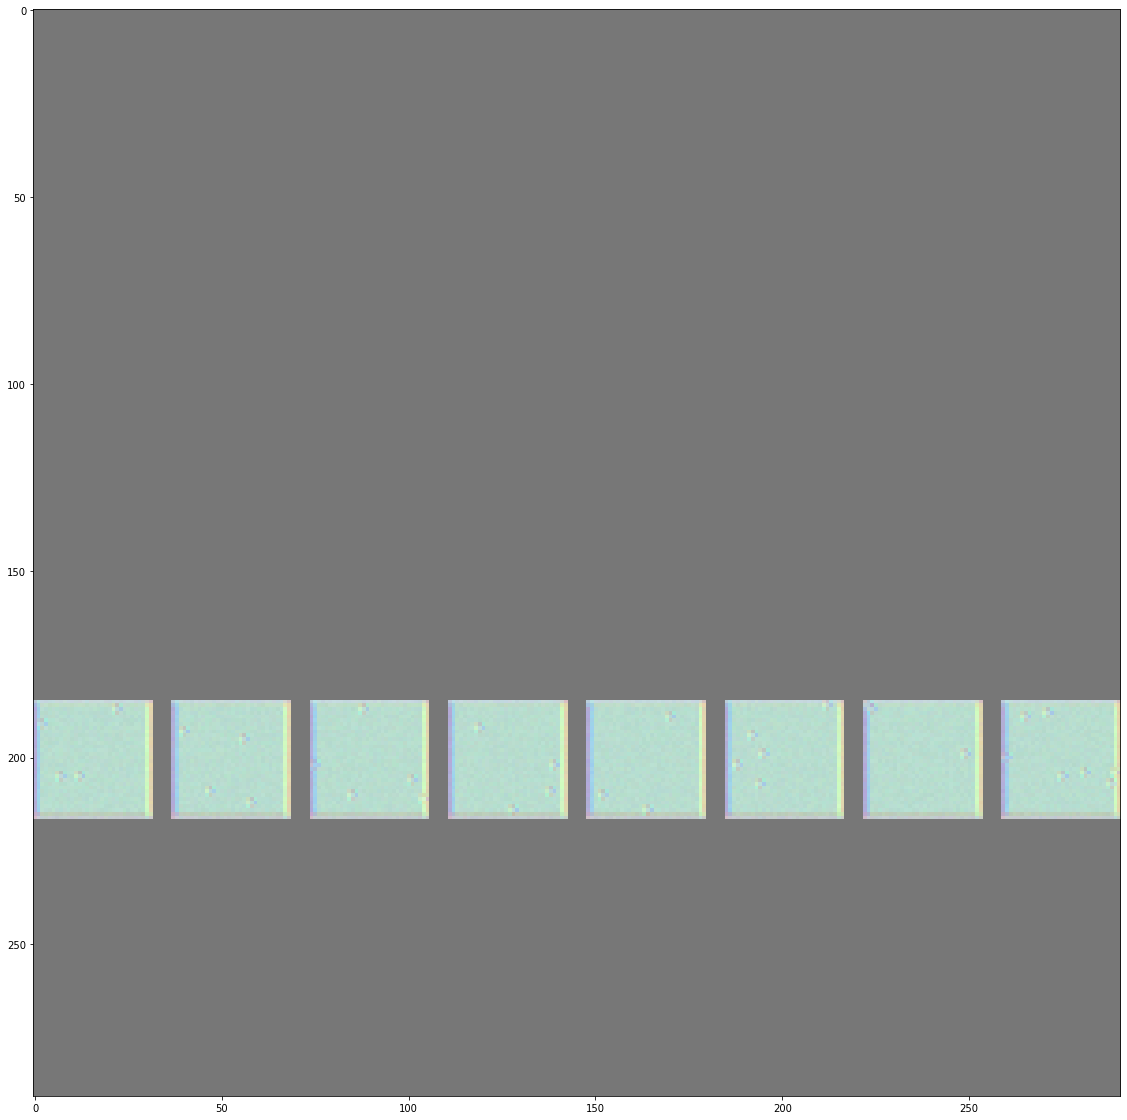

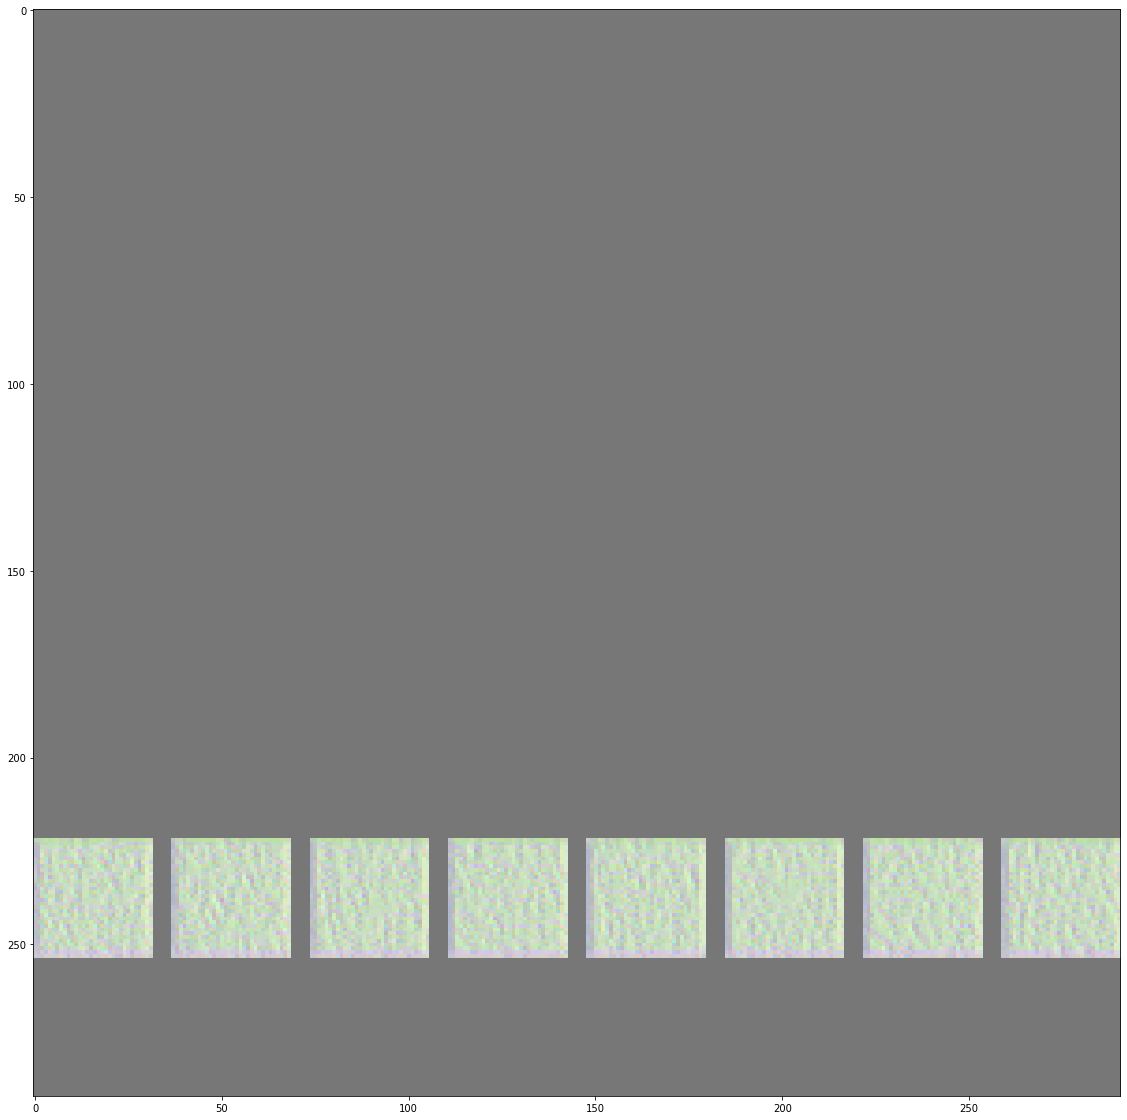

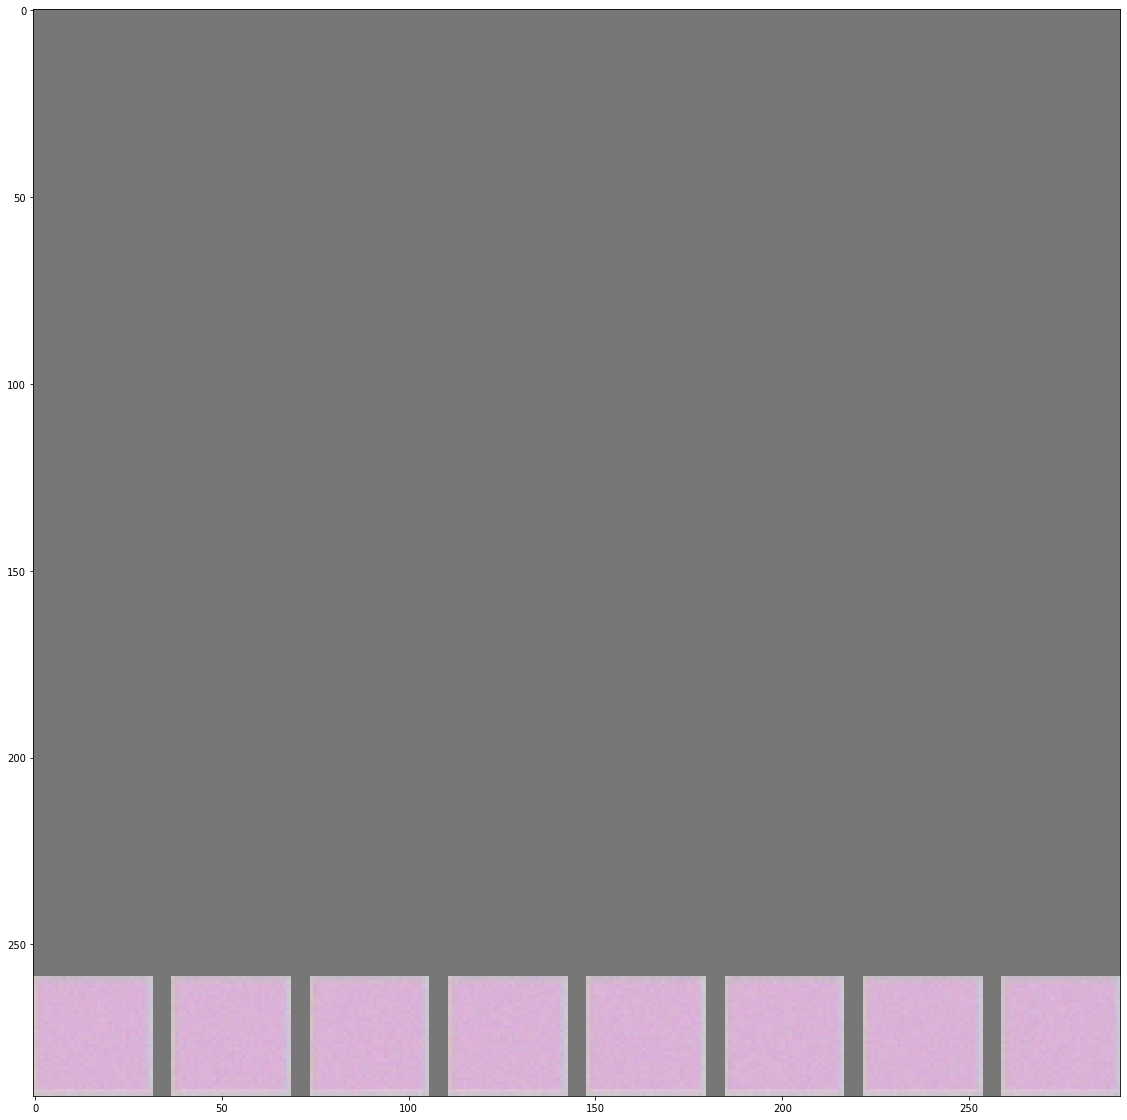

In [6]:
#Visualize for Filters
from keras import backend as K
model = load_model('cats_dogs_model.h5')
model.summary()
# layer_name = 'block3_conv1'
filter_index = 0
# layer_output = model.get_layer(layer_name).output
# loss = K.mean(layer_output[:, :, :, filter_index])
# #Computer loss gradient wrt input
# grads = K.gradients(loss, model.input)[0]
# grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
# iterate = K.function([model.input], [loss, grads])
# loss_value, gards_value = iterate((1, 150, 150, 3)) * 20 + 128
# step = 1
# for i in range(40):
#     loss_value, grads_value = iterate([input_img_data])
#     input_img_data += grads_value * step

#Visualize filter
def deprocess_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    x += 0.5
    x = np.clip(x, 0, 1)
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def generate_pattern(layer_name, filter_index, size = 150):
    layer_output = model.get_layer(layer_name).output
#     print(layer_output)
    loss = K.mean(layer_output[:, :, :, filter_index])
    #Compute loss gradient wrt input
    grads = K.gradients(loss, model.input)[0]
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    iterate = K.function([model.input], [loss, grads])
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128
    step = 1
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
    img = input_img_data[0]
    return deprocess_image(img)
count = 0
layer_name = 'conv2d_1'
size = 32
margin = 5
results = np.zeros((8 * size+7 *margin, 8* size+7*margin, 3))
for i in range(8):
    for j in range(8):
        if count < 32:
            filter_img = generate_pattern(layer_name, count, size=size)
            horizontal_start = i*size + i* margin
            horizontal_end = horizontal_start + size
            vertical_start = j*size + j*margin
            vertical_end = vertical_start + size
            results[horizontal_start: horizontal_end, vertical_start:vertical_end, :] = filter_img
    count += 1
    #Plotting
    plt.figure(figsize=(20, 20))
    plt.imshow(deprocess_image(results))

In [7]:
from keras.applications import VGG16
conv_base = VGG16(weights = 'imagenet', include_top = False, input_shape = 
                 (150, 150, 3))
conv_base.summary()
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name =='block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        
# for layer in conv_base.layers:
#     print(layer, layer.trainable)

model1 = Sequential()
model1.add(conv_base)
model1.add(layers.Flatten())
model1.add(layers.Dense(256, activation = 'relu'))
model1.add(layers.Dense(1, activation = 'sigmoid'))
model1.summary()

#model compile
opt = keras.optimizers.RMSprop(lr = 2e-5)
model1.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['acc'])

#Fit model
history = model1.fit_generator(train_generator, steps_per_epoch=100, epochs=30,
                             validation_data=validation_generator,validation_steps=50)
model1.save('cats_dogs_frozen.h5')
# test_loss, test_acc = model1.evaluate_generator(test_generator, steps = 50)
# print('test acc:', test_acc)

58892288/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

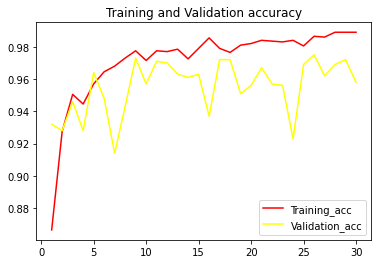

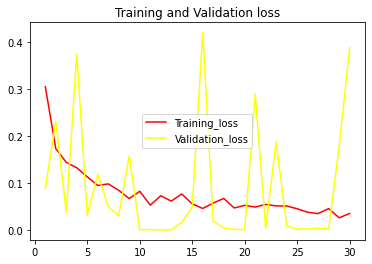

In [10]:
#Plot for VGG16 conv layers with frozen conv layers and no augmentation
acc = history.history['acc']
epochs = range(1, len(acc) + 1)
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

#Accuracy plot
plt.plot(epochs, acc, color = 'red', label = 'Training_acc')
plt.plot(epochs, val_acc, color = 'yellow', label = 'Validation_acc')
plt.title('Training and Validation accuracy')
plt.legend()

#Loss plot
plt.figure()
plt.plot(epochs, loss, color = 'red', label = 'Training_loss')
plt.plot(epochs, val_loss, color = 'yellow', label = 'Validation_loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [11]:
conv_base.trainable = True
set_trainable = True
for layer in conv_base.layers:
    if layer.name =='block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = True
# for layer in conv_base.layers:
#     print(layer, layer.trainable)
model2 = Sequential()
model2.add(conv_base)
model2.add(layers.Flatten())
model2.add(layers.Dense(256, activation = 'relu'))
model2.add(layers.Dense(1, activation = 'sigmoid'))
model2.summary()

#model compile
opt = keras.optimizers.RMSprop(lr = 2e-5)
model2.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['acc'])

#Fit model
history = model2.fit_generator(train_generator, steps_per_epoch=100, epochs=30,
                             validation_data=validation_generator,validation_steps=50)
model2.save('cats_dogs_unfrozen.h5')
# test_loss, test_acc = model2.evaluate_generator(test_generator, steps = 50)
# print('test acc:', test_acc)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
100/100 [==============================] - 24s 237ms/step - loss: 0.0961 - acc: 0.9585 - val_loss: 0.1219 - val_acc: 0.9530
Epoch 2/30
100/100 [==============================] - 21s 208ms/step - loss: 0.0384 - acc: 0.9860 - val_l

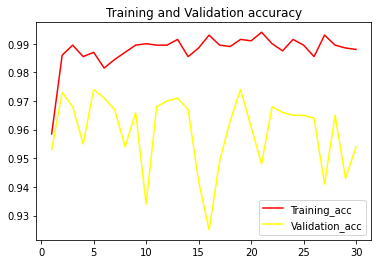

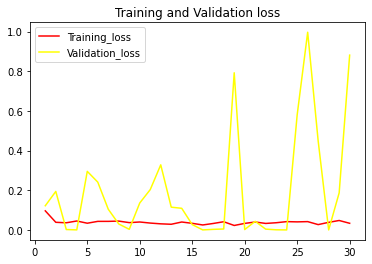

In [12]:
#Plot for Unfrozen conv layers with no augmentation
acc = history.history['acc']
epochs = range(1, len(acc) + 1)
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

#Accuracy plot
plt.plot(epochs, acc, color = 'red', label = 'Training_acc')
plt.plot(epochs, val_acc, color = 'yellow', label = 'Validation_acc')
plt.title('Training and Validation accuracy')
plt.legend()

#Loss plot
plt.figure()
plt.plot(epochs, loss, color = 'red', label = 'Training_loss')
plt.plot(epochs, val_loss, color = 'yellow', label = 'Validation_loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [13]:
#Data Augmentation and reiterating with frozen layers
train_datagen = ImageDataGenerator(rescale=1/255, rotation_range=40,
                                  width_shift_range=0.2, height_shift_range=0.2,
                                  shear_range=0.2, zoom_range=0.2,
                                  horizontal_flip=True, fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (150, 150), 
                                                    batch_size = 20, 
                                                    class_mode = 'binary')
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name =='block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        
# for layer in conv_base.layers:
#     print(layer, layer.trainable)

model_final = Sequential()
model_final.add(conv_base)
model_final.add(layers.Flatten())
model.add(layers.Dropout(0.5, noise_shape=None, seed=None))
model_final.add(layers.Dense(256, activation = 'relu'))
model.add(layers.BatchNormalization())
model_final.add(layers.Dense(1, activation = 'sigmoid'))
model_final.summary()

#model compile
opt = keras.optimizers.RMSprop(lr = 2e-4)
model_final.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['acc'])

#Fit model
history = model_final.fit_generator(train_generator, steps_per_epoch=100, epochs=30,
                             validation_data=validation_generator,validation_steps=50)
model_final.save('cats_dogs_vgg16_augmented_frozen.h5')

# test_loss, test_acc = model_final.evaluate_generator(test_generator, steps = 50)
# print('test acc:', test_acc)

Found 2000 images belonging to 2 classes.
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_5 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________
Epoch 1/30
100/100 [==============================] - 21s 210ms/step - loss: 0.3982 - acc: 0.9165 - val_loss: 0.1313 - val_acc: 0.9470
Epoch 2/30
100/100 [==============================] - 19

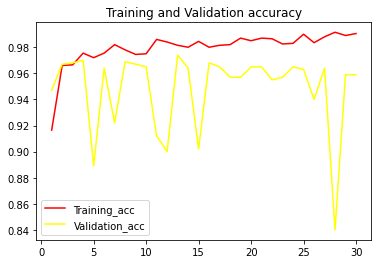

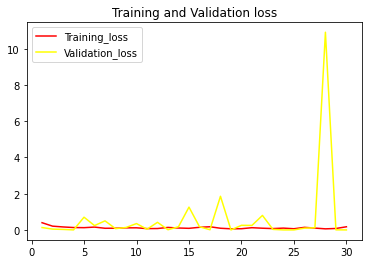

In [14]:
#Plot for Agumentated data with frozen layers 
acc = history.history['acc']
epochs = range(1, len(acc) + 1)
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

#Accuracy plot
plt.plot(epochs, acc, color = 'red', label = 'Training_acc')
plt.plot(epochs, val_acc, color = 'yellow', label = 'Validation_acc')
plt.title('Training and Validation accuracy')
plt.legend()

#Loss plot
plt.figure()
plt.plot(epochs, loss, color = 'red', label = 'Training_loss')
plt.plot(epochs, val_loss, color = 'yellow', label = 'Validation_loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

**PROGRAMMING QUESTIONS - 2 (CIFAR-10)**

In [15]:
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))


def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        d = pickle.load(fo, encoding='bytes')
    return d

def read_data(folder):
    x_data_temp = []
    y_data_temp = []
    x_test_data_temp = []
    y_test_data_temp = []

    for file in os.listdir(folder):
        if file.endswith(".meta") or file.endswith(".html"):
            print("Ignoring html and meta files")
        elif "test_batch" in file:
            # test data file detected. we are gonna load it separately
            test_data_temp = unpickle(folder + "/" + file)
            x_test_data_temp.append(test_data_temp[b'data'])
            y_test_data_temp.append(test_data_temp[b'labels'])
        else:
            temp_data = unpickle(folder + "/" + file)
            x_data_temp.append(temp_data[b'data'])
            y_data_temp.append(temp_data[b'labels'])
    x_data = np.array(x_data_temp)
    y_data = np.array(y_data_temp)
    x_test_data = np.array(x_test_data_temp)
    y_test_data = np.array(y_test_data_temp)
    return [x_data, y_data, x_test_data, y_test_data]

X_train_temp, y_train_temp, X_test_temp, y_test_temp = read_data("/kaggle/input/cifar10-assignment4/cifar-10-batches-py")

X_train_temp = X_train_temp.reshape(X_train_temp.shape[0] * X_train_temp.shape[1], X_train_temp.shape[2])
y_train_temp = y_train_temp.reshape(y_train_temp.shape[0] * y_train_temp.shape[1])
X_test_temp = X_test_temp.reshape(X_test_temp.shape[0] * X_test_temp.shape[1], X_test_temp.shape[2])
y_test_temp = y_test_temp.reshape(y_test_temp.shape[0] * y_test_temp.shape[1])
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train_temp, y_train_temp, random_state=4)
X_test, y_test = shuffle(X_test_temp, y_test_temp, random_state=4)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=4)

# Keras Parameters
batch_size = 32
nb_classes = 10
nb_epoch = 70
img_rows, img_col = 32, 32
img_channels = 3
nb_filters = 32
nb_pool = 2
nb_conv = 3

X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
y_train = keras.utils.to_categorical(y_train, nb_classes)

X_val = X_val.reshape(X_val.shape[0], 32, 32, 3)
y_val = keras.utils.to_categorical(y_val, nb_classes)

X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
y_test = keras.utils.to_categorical(y_test, nb_classes)

X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_val /= 255
X_test /= 255

model = Sequential()

model.add(layers.Conv2D(nb_filters, (nb_conv, nb_conv),
                 padding='valid',
                 activation='relu',
                 input_shape=(img_rows, img_col, img_channels)))

model.add(layers.Conv2D(nb_filters, (nb_conv, nb_conv), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(nb_filters, (nb_conv, nb_conv), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(nb_classes, activation='softmax'))



model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch,
                    verbose=1, validation_data=(X_test, y_test))

model.save('Question2_CIFAR10')


Ignoring html and meta files
Ignoring html and meta files
Train on 40000 samples, validate on 10000 samples
Epoch 1/70
40000/40000 [==============================] - 8s 191us/step - loss: 1.9186 - accuracy: 0.2967 - val_loss: 1.6825 - val_accuracy: 0.4147
Epoch 2/70
40000/40000 [==============================] - 7s 178us/step - loss: 1.6649 - accuracy: 0.3959 - val_loss: 1.5165 - val_accuracy: 0.4613
Epoch 3/70
40000/40000 [==============================] - 7s 179us/step - loss: 1.5852 - accuracy: 0.4252 - val_loss: 1.4849 - val_accuracy: 0.4984
Epoch 4/70
40000/40000 [==============================] - 7s 176us/step - loss: 1.5251 - accuracy: 0.4535 - val_loss: 1.4324 - val_accuracy: 0.5133
Epoch 5/70
40000/40000 [==============================] - 7s 182us/step - loss: 1.4901 - accuracy: 0.4640 - val_loss: 1.3707 - val_accuracy: 0.5305
Epoch 6/70
40000/40000 [==============================] - 8s 193us/step - loss: 1.4660 - accuracy: 0.4746 - val_loss: 1.3499 - val_accuracy: 0.5301
Epoc

40000/40000 [==============================] - 7s 186us/step - loss: 1.2392 - accuracy: 0.5577 - val_loss: 1.2683 - val_accuracy: 0.5828
Epoch 56/70
40000/40000 [==============================] - 8s 212us/step - loss: 1.2439 - accuracy: 0.5554 - val_loss: 1.1989 - val_accuracy: 0.5912
Epoch 57/70
40000/40000 [==============================] - 8s 188us/step - loss: 1.2374 - accuracy: 0.5581 - val_loss: 1.2425 - val_accuracy: 0.5753
Epoch 58/70
40000/40000 [==============================] - 7s 180us/step - loss: 1.2429 - accuracy: 0.5592 - val_loss: 1.1846 - val_accuracy: 0.5894
Epoch 59/70
40000/40000 [==============================] - 7s 182us/step - loss: 1.2463 - accuracy: 0.5565 - val_loss: 1.2576 - val_accuracy: 0.5781
Epoch 60/70
40000/40000 [==============================] - 7s 185us/step - loss: 1.2333 - accuracy: 0.5580 - val_loss: 1.2398 - val_accuracy: 0.5846
Epoch 61/70
40000/40000 [==============================] - 7s 184us/step - loss: 1.2374 - accuracy: 0.5586 - val_loss:

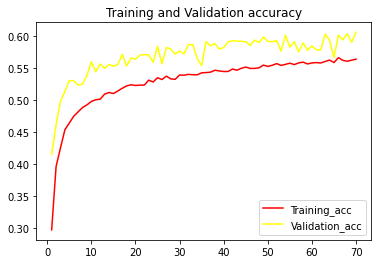

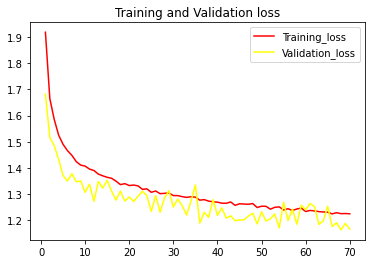

In [16]:
#Plots
acc = history.history['accuracy']
# print(history.history)
epochs = range(1, len(acc) + 1)
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

#Accuracy plot
plt.plot(epochs, acc, color = 'red', label = 'Training_acc')
plt.plot(epochs, val_acc, color = 'yellow', label = 'Validation_acc')
plt.title('Training and Validation accuracy')
plt.legend()

#Loss plot
plt.figure()
plt.plot(epochs, loss, color = 'red', label = 'Training_loss')
plt.plot(epochs, val_loss, color = 'yellow', label = 'Validation_loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [18]:
#Creating inception block on CIFAR10

from keras.layers import Input
input_img = Input(shape = (32, 32, 3))

from keras.layers import Conv2D, MaxPooling2D
tower_1 = Conv2D(64, (1,1), padding='same', activation='relu')(input_img)
tower_1 = Conv2D(64, (3,3), padding='same', activation='relu')(tower_1)
tower_1 = layers.Dropout(0.5)(tower_1)
tower_1 = layers.BatchNormalization()(tower_1)
tower_2 = Conv2D(64, (1,1), padding='same', activation='relu')(input_img)
tower_2 = Conv2D(64, (5,5), padding='same', activation='relu')(tower_2)
tower_2 = layers.Dropout(0.5)(tower_2)
tower_2 = layers.BatchNormalization()(tower_2)
tower_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(input_img)
tower_3 = Conv2D(64, (1,1), padding='same', activation='relu')(tower_3)
tower_3 = layers.Dropout(0.5)(tower_3)
tower_3 = layers.BatchNormalization()(tower_3)

output = keras.layers.concatenate([tower_1, tower_2, tower_3], axis = -1)

output = Flatten()(output)
out = Dense(10, activation='softmax')(output)

from keras.models import Model
model = Model(inputs = input_img, outputs = out)
# print model.summary()

lrate = 0.0001
opt = keras.optimizers.RMSprop(lr = 1e-4)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=nb_epoch, batch_size=32)

scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 40000 samples, validate on 10000 samples
Epoch 1/70
40000/40000 [==============================] - 22s 538us/step - loss: 1.6546 - accuracy: 0.4419 - val_loss: 1.2970 - val_accuracy: 0.5487
Epoch 2/70
40000/40000 [==============================] - 21s 525us/step - loss: 1.2740 - accuracy: 0.5696 - val_loss: 1.1956 - val_accuracy: 0.5908
Epoch 3/70
40000/40000 [==============================] - 20s 509us/step - loss: 1.0858 - accuracy: 0.6355 - val_loss: 1.2969 - val_accuracy: 0.5656
Epoch 4/70
40000/40000 [==============================] - 21s 518us/step - loss: 0.9406 - accuracy: 0.6822 - val_loss: 1.2070 - val_accuracy: 0.6070
Epoch 5/70
40000/40000 [==============================] - 20s 508us/step - loss: 0.8210 - accuracy: 0.7247 - val_loss: 1.2178 - val_accuracy: 0.6109
Epoch 6/70
40000/40000 [==============================] - 20s 503us/step - loss: 0.7175 - accuracy: 0.7593 - val_loss: 1.3082 - val_accuracy: 0.6075
Epoch 7/70
40000/40000 [==============================] 

40000/40000 [==============================] - 20s 512us/step - loss: 0.0921 - accuracy: 0.9727 - val_loss: 3.0223 - val_accuracy: 0.6181
Epoch 56/70
40000/40000 [==============================] - 20s 496us/step - loss: 0.0982 - accuracy: 0.9716 - val_loss: 2.9210 - val_accuracy: 0.6190
Epoch 57/70
40000/40000 [==============================] - 20s 499us/step - loss: 0.1030 - accuracy: 0.9704 - val_loss: 3.2689 - val_accuracy: 0.6006
Epoch 58/70
40000/40000 [==============================] - 20s 512us/step - loss: 0.1034 - accuracy: 0.9705 - val_loss: 3.4083 - val_accuracy: 0.5914
Epoch 59/70
40000/40000 [==============================] - 20s 499us/step - loss: 0.1006 - accuracy: 0.9708 - val_loss: 3.2616 - val_accuracy: 0.5754
Epoch 60/70
40000/40000 [==============================] - 20s 505us/step - loss: 0.1036 - accuracy: 0.9690 - val_loss: 3.0197 - val_accuracy: 0.6097
Epoch 61/70
40000/40000 [==============================] - 20s 512us/step - loss: 0.1040 - accuracy: 0.9708 - va

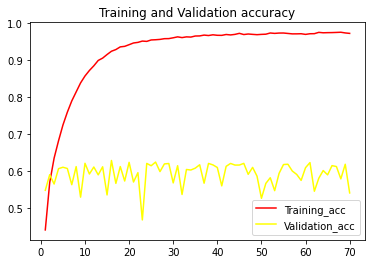

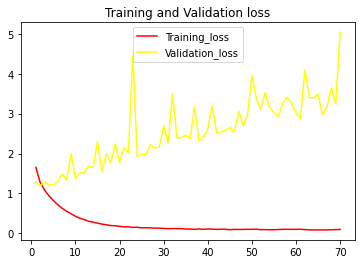

In [19]:
#Plots
acc = history.history['accuracy']
# print(history.history)
epochs = range(1, len(acc) + 1)
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

#Accuracy plot
plt.plot(epochs, acc, color = 'red', label = 'Training_acc')
plt.plot(epochs, val_acc, color = 'yellow', label = 'Validation_acc')
plt.title('Training and Validation accuracy')
plt.legend()

#Loss plot
plt.figure()
plt.plot(epochs, loss, color = 'red', label = 'Training_loss')
plt.plot(epochs, val_loss, color = 'yellow', label = 'Validation_loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [ ]:
# example of a CNN model with an identity or projection residual module
from keras.models import Model
from keras.layers import Input
from keras.layers import Activation
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import add
from keras.utils import plot_model

img_tensor = Input((32, 32, 3))
block_1 = Conv2D(64, (3,3), padding='same', activation='relu')(img_tensor)
block_1 = MaxPooling2D((3,3), strides=(1,1), padding='same')(block_1)
block_1 = layers.Dropout(0.5)(block_1)
block_1 = layers.BatchNormalization()(block_1)

block_2 = Conv2D(64, (3,3), padding='same', activation='relu')(block_1)
block_2 = layers.Dropout(0.5)(block_2)
block_2 = layers.BatchNormalization()(block_2)

resnet_1 = layers.add([block_1, block_2])

block_3 = Conv2D(64, (3,3), padding='same', activation='relu')(resnet_1)
block_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(block_3)
block_3 = layers.Dropout(0.5)(block_3)
block_3 = layers.BatchNormalization()(block_3)

block_4 = Conv2D(64, (3,3), padding='same', activation='relu')(block_3)
block_4 = layers.Dropout(0.5)(block_4)
block_4 = layers.BatchNormalization()(block_4)

resnet_2 = layers.add([block_3, block_4])

output = Flatten()(resnet_2) 
out = Dense(10, activation='softmax')(output)

model = Model(inputs = img_tensor, outputs = out)
# print model.summary()

lrate = 0.0001
opt = keras.optimizers.RMSprop(lr = 1e-4)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=nb_epoch, batch_size=32)

Train on 40000 samples, validate on 10000 samples
Epoch 1/70
40000/40000 [==============================] - 23s 577us/step - loss: 2.5815 - accuracy: 0.3228 - val_loss: 2.7241 - val_accuracy: 0.3017
Epoch 2/70
40000/40000 [==============================] - 22s 539us/step - loss: 2.2568 - accuracy: 0.4115 - val_loss: 3.0330 - val_accuracy: 0.3434
Epoch 3/70
40000/40000 [==============================] - 21s 536us/step - loss: 2.0980 - accuracy: 0.4498 - val_loss: 2.9803 - val_accuracy: 0.3400
Epoch 4/70
40000/40000 [==============================] - 22s 553us/step - loss: 1.9930 - accuracy: 0.4776 - val_loss: 2.9506 - val_accuracy: 0.3951
Epoch 5/70
40000/40000 [==============================] - 21s 536us/step - loss: 1.9116 - accuracy: 0.4960 - val_loss: 2.7467 - val_accuracy: 0.4088
Epoch 6/70
40000/40000 [==============================] - 21s 536us/step - loss: 1.8284 - accuracy: 0.5139 - val_loss: 2.5514 - val_accuracy: 0.4446
Epoch 7/70
40000/40000 [==============================] 

In [ ]:
acc = history.history['accuracy']
# print(history.history)
epochs = range(1, len(acc) + 1)
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

#Accuracy plot
plt.plot(epochs, acc, color = 'red', label = 'Training_acc')
plt.plot(epochs, val_acc, color = 'yellow', label = 'Validation_acc')
plt.title('Training and Validation accuracy')
plt.legend()

#Loss plot
plt.figure()
plt.plot(epochs, loss, color = 'red', label = 'Training_loss')
plt.plot(epochs, val_loss, color = 'yellow', label = 'Validation_loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()